<a href="https://www.kaggle.com/code/preechaeamsaart/most-effective-strikers?scriptVersionId=98899364" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/player-scores/players.csv
/kaggle/input/player-scores/leagues.csv
/kaggle/input/player-scores/competitions.csv
/kaggle/input/player-scores/games.csv
/kaggle/input/player-scores/player_valuations.csv
/kaggle/input/player-scores/appearances.csv
/kaggle/input/player-scores/clubs.csv


In [2]:
def combine_stats(x,y):
    return x+y

def aggregate(x):
    return sum(x)

def name(x):
    return x[0]

def p90_calculator(*args,total_minutes=0):
    total_goals=0
    total_minutes_played=0
    for stat in args:
        total_goals=total_goals+stat
    return total_goals / (total_minutes / 90)

In [3]:
# read in relevant datasets
df_appearances = pd.read_csv("/kaggle/input/player-scores/appearances.csv")
df_players = pd.read_csv("/kaggle/input/player-scores/players.csv")

# get player names along with stats
df = df_appearances.merge(df_players, on=['player_id'])

# group all unique player stats
df = df.groupby('player_id').agg(lambda col: np.sort(col.unique()).tolist())

# data is in lists, add values to get total goals/assists
df['total_minutes_played']=df['minutes_played'].apply(aggregate)
df['total_goals']=df['goals'].apply(aggregate)
df['total_assists']=df['assists'].apply(aggregate)
df['pretty_name']= df['pretty_name'].apply(name)

# add columns to get direct goal contribution
df['direct_goal_contribution']=combine_stats(df['total_assists'],df['total_goals'])
df=df.sort_values('direct_goal_contribution', ascending=False)

# these are the relevant columns to keep
target=['player_id', 'pretty_name', 'date_of_birth', 'position','total_minutes_played','total_goals','total_assists','direct_goal_contribution',]

# remove all columns not specified above
for item in df.columns:
    if item not in target:
        del df[item]

df.head()

,pretty_name,date_of_birth,position,total_minutes_played,total_goals,total_assists,direct_goal_contribution
player_id,,,,,,,
30418,Marcus Berg,[1986-08-17],[Attack],2323,15,3,18
8198,Cristiano Ronaldo,[1985-02-05],[Attack],2118,15,3,18
26399,Sergio Aguero,[1988-06-02],[Attack],3122,15,3,18
38253,Robert Lewandowski,[1988-08-21],[Attack],2522,15,3,18
132098,Harry Kane,[1993-07-28],[Attack],2122,10,7,17


,pretty_name,date_of_birth,position,total_minutes_played,total_goals,total_assists,direct_goal_contribution,goals_per_90
player_id,,,,,,,,
30418,Marcus Berg,[1986-08-17],[Attack],2323,15,3,18,0.581145
8198,Cristiano Ronaldo,[1985-02-05],[Attack],2118,15,3,18,0.637394
26399,Sergio Aguero,[1988-06-02],[Attack],3122,15,3,18,0.432415
38253,Robert Lewandowski,[1988-08-21],[Attack],2522,15,3,18,0.535289
132098,Harry Kane,[1993-07-28],[Attack],2122,10,7,17,0.424128


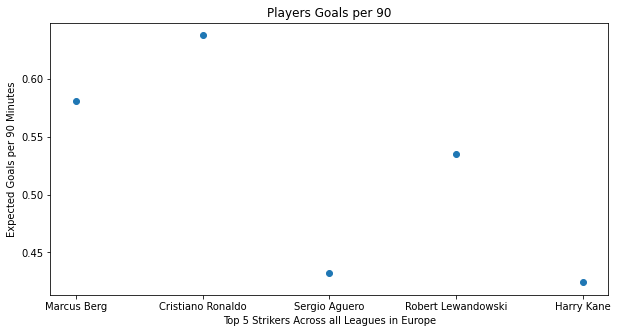

In [4]:
# goals per 90 min calc
df['goals_per_90']=p90_calculator(df.total_goals, total_minutes=df.total_minutes_played)

# create x-axis of top 5 players
players=df['pretty_name'][0:5]

# y-axis for their corresponding goals per 90
goals_per_90_minutes=df['goals_per_90'][0:5]

# scatterplot to visualize
plt.figure(figsize=(10, 5))
plt.xlabel('Top 5 Strikers Across all Leagues in Europe')
plt.ylabel('Expected Goals per 90 Minutes')
plt.title('Players Goals per 90')
plt.scatter(players, goals_per_90_minutes)

df.head()